In [1]:
%pdb off
import os,io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def readGrant():
    data = pd.read_excel('/home/calvin/Documents/vuletic/grasp2K_v1_1/manual/grant/6s2-levels.xlsx',header=0)
    return dict(zip(data['Subshell'],data['e']))

def readGrasp(filename = 'grasp399.sum', nskip = 31,graspdir = '/home/calvin/Documents/vuletic/grasp2K_v1_1/manual/example5test'):
    

    data = pd.read_csv(os.path.join(graspdir,filename),skiprows = nskip,nrows=30,delim_whitespace=True)
    data['e'] = [float(energy.replace('D','E',1)) for energy in data['e']]
    #return data['Subshell'].values,data['e'].values
    return dict(zip(data['Subshell'],data['e']))



Automatic pdb calling has been turned OFF


In [2]:
def compare(test,master):
    frac = {}
    for key in master.keys():
        try:
            frac[key] = (test[key] - master[key]) / np.abs(master[key])
        except KeyError:
            frac[key] = 0
    return frac
def compareDelta(test,master):
    delta = {}
    for key in master.keys():
        try:
            delta[key] = test[key] - master[key]
        except KeyError:
            delta[key] = 0
    return delta

def plotCompare(D):
    # sort first by abs value
    keys = np.array(list(D.keys()))
    vals = np.array(list(D.values()))
    args = np.argsort(np.abs(vals))
    color = ['b' if np.sign(val) > 0 else 'r' for val in vals]
    plt.barh(range(len(D)), np.abs(vals[args]), align='center',color=color)
    plt.yticks(range(len(D)), keys[args])
    plt.xscale('log')
    plt.xlim([1e-8,1])
grant = readGrant()

0.20441539928 0.18813049513
book: 0.19652


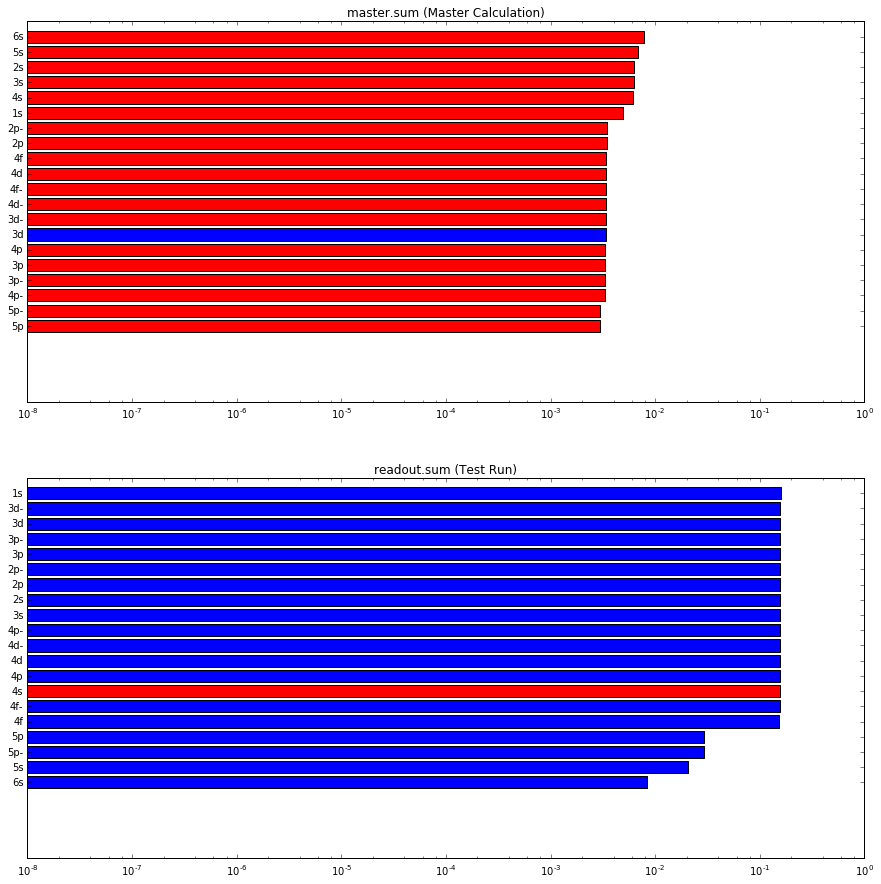

In [3]:
plt.subplots(nrows=2,ncols=1,sharex=True,figsize=(15,15))

plt.subplot(211)
master = readGrasp('master.sum',graspdir = '/home/calvin/Documents/vuletic/grasp2K_v1_1/manual/6s2/',nskip=29)
frac1 = compareDelta(master,grant)
plotCompare(frac1)
plt.title('master.sum (Master Calculation)')

plt.subplot(212)
readout = readGrasp('readout.sum',nskip=31)
frac2 = compareDelta(readout,grant)
plt.title('readout.sum (Test Run)')

shell = '6s'
print(master[shell],readout[shell])
print('book:',grant[shell])
plotCompare(frac2)
plt.show()

In [4]:
readout = readGrasp('readout.sum')
readout


{'1s': 2267.8130667999999,
 '2p': 331.64451957,
 '2p-': 370.21239742,
 '2s': 389.04942477999998,
 '3d': 57.548112535999998,
 '3d-': 59.349471727999997,
 '3p': 73.251247186000001,
 '3p-': 81.579500334000002,
 '3s': 89.866233308000005,
 '4d': 7.5781026413000001,
 '4d-': 7.9341996117000004,
 '4f': 0.6343337335,
 '4f-': 0.69353251265000004,
 '4p': 13.529572219,
 '4p-': 15.431486652,
 '4s': 18.827561484,
 '5d': 0.15088908743000001,
 '5d-': 0.15164240039999999,
 '5f': 0.68723051917,
 '5f-': 0.69210568525000005,
 '5p': 1.2120953860999999,
 '5p-': 1.4481309275000001,
 '5s': 2.4600068687999999,
 '6d': 0.055555966448000003,
 '6d-': 0.055556295175999998,
 '6f': 0.055555802089000003,
 '6f-': 0.055555966448000003,
 '6p': 0.095311166890999999,
 '6p-': 0.092117427311000005,
 '6s': 0.18813049512999999}

In [5]:
graspreadout['1s']

NameError: name 'graspreadout' is not defined

In [ ]:
grant['1s']